In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = "/content/turkey_earthquakes(1915-2023_may).csv"

try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
    except UnicodeDecodeError:
        print("ISO-8859-1 veya latin-1 kodlaması ile dosyanın kodu çözülemedi")
        print("Lütfen dosyanızla eşleşen farklı bir kodlama deneyin.")

In [2]:
df.shape

(19908, 15)

In [3]:
df.describe()

,No,Deprem Kodu,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb
count,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,6927.000000,19908.000000,19908.000000
mean,9954.500000,1.998843e+13,38.048908,32.445884,14.783353,3.981932,1.720027,2.292797,3.757759,0.466139,1.149985
std,5747.088915,2.032333e+11,1.599778,5.836924,20.689789,0.531742,1.994174,2.033467,1.465258,1.423211,1.926788
min,1.000000,1.915021e+13,35.000000,26.000000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4977.750000,1.987111e+13,36.820000,27.591950,5.000000,3.600000,0.000000,0.000000,3.600000,0.000000,0.000000
50%,9954.500000,2.003112e+13,38.110000,29.750000,8.500000,3.800000,0.000000,3.500000,3.900000,0.000000,0.000000
75%,14931.250000,2.015022e+13,39.122775,37.260000,14.000000,4.200000,3.700000,4.000000,4.600000,0.000000,3.500000
max,19908.000000,2.023043e+13,41.998200,44.999200,199.000000,7.900000,7.200000,7.500000,7.700000,7.900000,7.100000


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           19908 non-null  int64  
 1   Deprem Kodu  19908 non-null  int64  
 2   Olus tarihi  19908 non-null  object 
 3   Olus zamani  19908 non-null  object 
 4   Enlem        19908 non-null  float64
 5   Boylam       19908 non-null  float64
 6   Derinlik     19908 non-null  float64
 7   xM           19908 non-null  float64
 8   MD           19908 non-null  float64
 9   ML           19908 non-null  float64
 10  Mw           6927 non-null   float64
 11  Ms           19908 non-null  float64
 12  Mb           19908 non-null  float64
 13  Tip          19908 non-null  object 
 14  Yer          19908 non-null  object 
dtypes: float64(9), int64(2), object(4)
memory usage: 2.3+ MB
None


In [5]:
print(df.isnull().sum())

No                 0
Deprem Kodu        0
Olus tarihi        0
Olus zamani        0
Enlem              0
Boylam             0
Derinlik           0
xM                 0
MD                 0
ML                 0
Mw             12981
Ms                 0
Mb                 0
Tip                0
Yer                0
dtype: int64


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Giriş değişkenleri
features = ['xM', 'MD', 'ML', 'Mb', 'Ms']

# 2. Eğitim verisi: Mw değeri olanlar
train_df = df[df['Mw'].notnull()]
X_train = train_df[features]
y_train = train_df['Mw']

# 3. Tahmin verisi: Mw eksik olanlar
test_df = df[df['Mw'].isnull()]
X_test = test_df[features]

# 4. Eksik değer içeren satırlar varsa onları at (model eğitiminden önce)
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
X_test = X_test.dropna()

# 5. Model eğitimi
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Mw tahmini
predicted_mw = model.predict(X_test)

# 7. Tahmin edilen değerleri orijinal df’ye geri yaz
df.loc[X_test.index, 'Mw'] = predicted_mw
df['Mw_is_imputed'] = df['Mw'].isnull().astype(int)

print("✅ Eksik Mw değerleri tahmin edilip dolduruldu.")


✅ Eksik Mw değerleri tahmin edilip dolduruldu.


In [7]:
print(df.isnull().sum())

No               0
Deprem Kodu      0
Olus tarihi      0
Olus zamani      0
Enlem            0
Boylam           0
Derinlik         0
xM               0
MD               0
ML               0
Mw               0
Ms               0
Mb               0
Tip              0
Yer              0
Mw_is_imputed    0
dtype: int64


In [8]:
print(df.columns.tolist())

['No', 'Deprem Kodu', 'Olus tarihi', 'Olus zamani', 'Enlem', 'Boylam', 'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer', 'Mw_is_imputed']


In [10]:
df['Olus tarihi'] = pd.to_datetime(df['Olus tarihi'])


In [11]:
# Gerekli sütunları seçme
df = df[['Olus tarihi', 'Olus zamani', 'Enlem', 'Boylam', 'Derinlik', 'Mw', 'ML', 'xM', 'Tip', 'Yer']]

# Eksik büyüklükler için Mw yerine ML veya xM kullanma
df['Büyüklük'] = df['Mw'].fillna(df['ML']).fillna(df['xM'])

# Tarih ve zamanı birleştirme
# Convert both columns to string type before concatenation
df['Timestamp'] = pd.to_datetime(df['Olus tarihi'].astype(str) + ' ' + df['Olus zamani'].astype(str))
df.drop(['Olus tarihi', 'Olus zamani', 'Mw', 'ML', 'xM'], axis=1, inplace=True)

<ipython-input-11-3946244487>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Büyüklük'] = df['Mw'].fillna(df['ML']).fillna(df['xM'])
<ipython-input-11-3946244487>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Olus tarihi'].astype(str) + ' ' + df['Olus zamani'].astype(str))
<ipython-input-11-3946244487>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Enlem      19908 non-null  float64       
 1   Boylam     19908 non-null  float64       
 2   Derinlik   19908 non-null  float64       
 3   Tip        19908 non-null  object        
 4   Yer        19908 non-null  object        
 5   Büyüklük   19908 non-null  float64       
 6   Timestamp  19908 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.1+ MB
None


In [13]:
df = df.rename(columns={'Timestamp': 'Oluş Zamanı'})

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Enlem        19908 non-null  float64       
 1   Boylam       19908 non-null  float64       
 2   Derinlik     19908 non-null  float64       
 3   Tip          19908 non-null  object        
 4   Yer          19908 non-null  object        
 5   Büyüklük     19908 non-null  float64       
 6   Oluş Zamanı  19908 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.1+ MB
None


In [15]:
df.to_csv('deprem_verisi.csv', encoding='utf-8-sig', index=False)

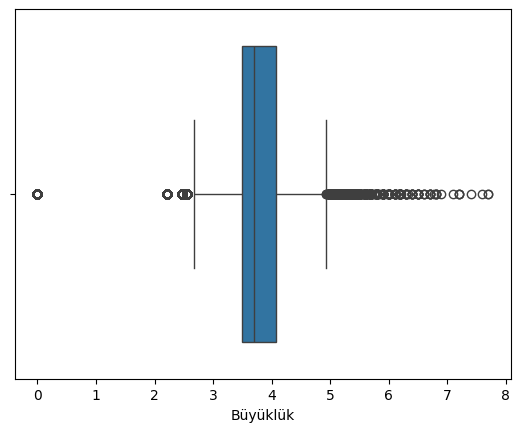

In [16]:
sns.boxplot(x=df['Büyüklük'])
plt.show()

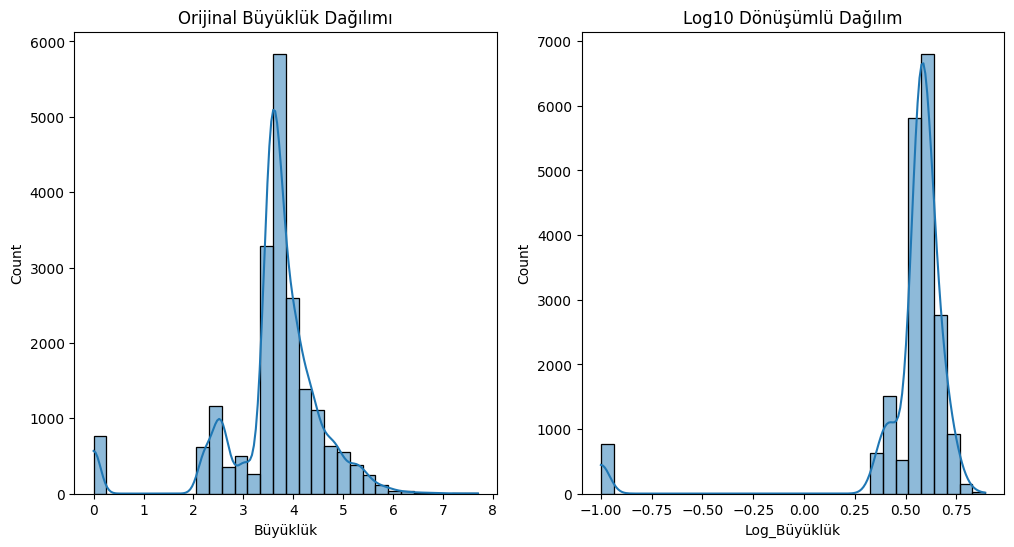

In [17]:
import numpy as np

# Büyüklük verisine log10 dönüşümü (Richter ölçeği zaten logaritmik olduğu için)
df['Log_Büyüklük'] = np.log10(df['Büyüklük'] + 0.1)  # +0.1 sıfır değerlerini önlemek için

# Orijinal ve log dönüşümlü verinin karşılaştırılması
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Büyüklük'], bins=30, kde=True)
plt.title('Orijinal Büyüklük Dağılımı')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Büyüklük'], bins=30, kde=True)
plt.title('Log10 Dönüşümlü Dağılım')
plt.show()

In [18]:
# 1. Büyüklük sınıfları oluşturma (artçı/öncü ayırımı için)
df['Büyüklük_Sınıfı'] = pd.cut(df['Büyüklük'],
                               bins=[0, 3, 5, 10],
                               labels=['Küçük', 'Orta', 'Büyük'])

# 2. Standardizasyon (log dönüşümü sonrası)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Log_Büyüklük_Std'] = scaler.fit_transform(df[['Log_Büyüklük']])

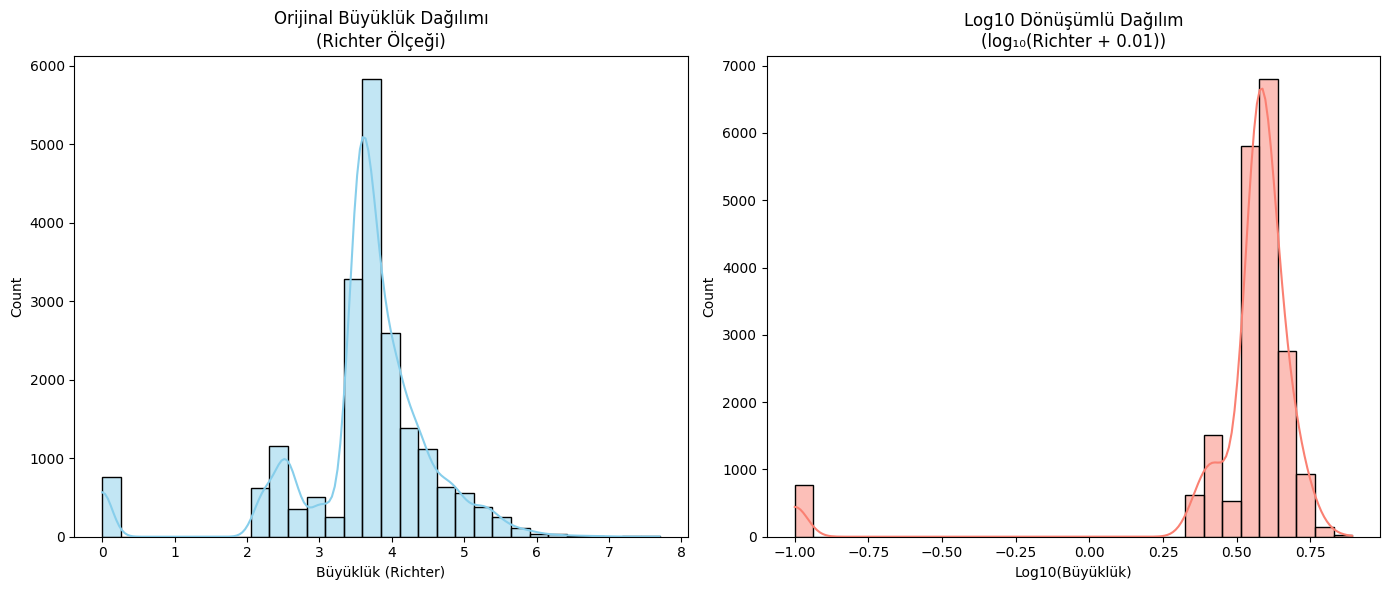

In [19]:
plt.figure(figsize=(14, 6))

# Orijinal ve log dönüşümlü dağılım karşılaştırması
plt.subplot(1, 2, 1)
sns.histplot(df['Büyüklük'], bins=30, kde=True, color='skyblue')
plt.title('Orijinal Büyüklük Dağılımı\n(Richter Ölçeği)')
plt.xlabel('Büyüklük (Richter)')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Büyüklük'], bins=30, kde=True, color='salmon')
plt.title('Log10 Dönüşümlü Dağılım\n(log₁₀(Richter + 0.01))')
plt.xlabel('Log10(Büyüklük)')

plt.tight_layout()
plt.show()

In [20]:
# 1. Büyüklük kategorileri oluşturma
df['Büyüklük_Kategori'] = pd.cut(df['Büyüklük'],
                                bins=[0, 3, 5, np.inf],
                                labels=['Hafif', 'Orta', 'Şiddetli'])

# 2. Log dönüşümü + standardizasyon
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Log_Büyüklük_Std'] = scaler.fit_transform(df[['Log_Büyüklük']])

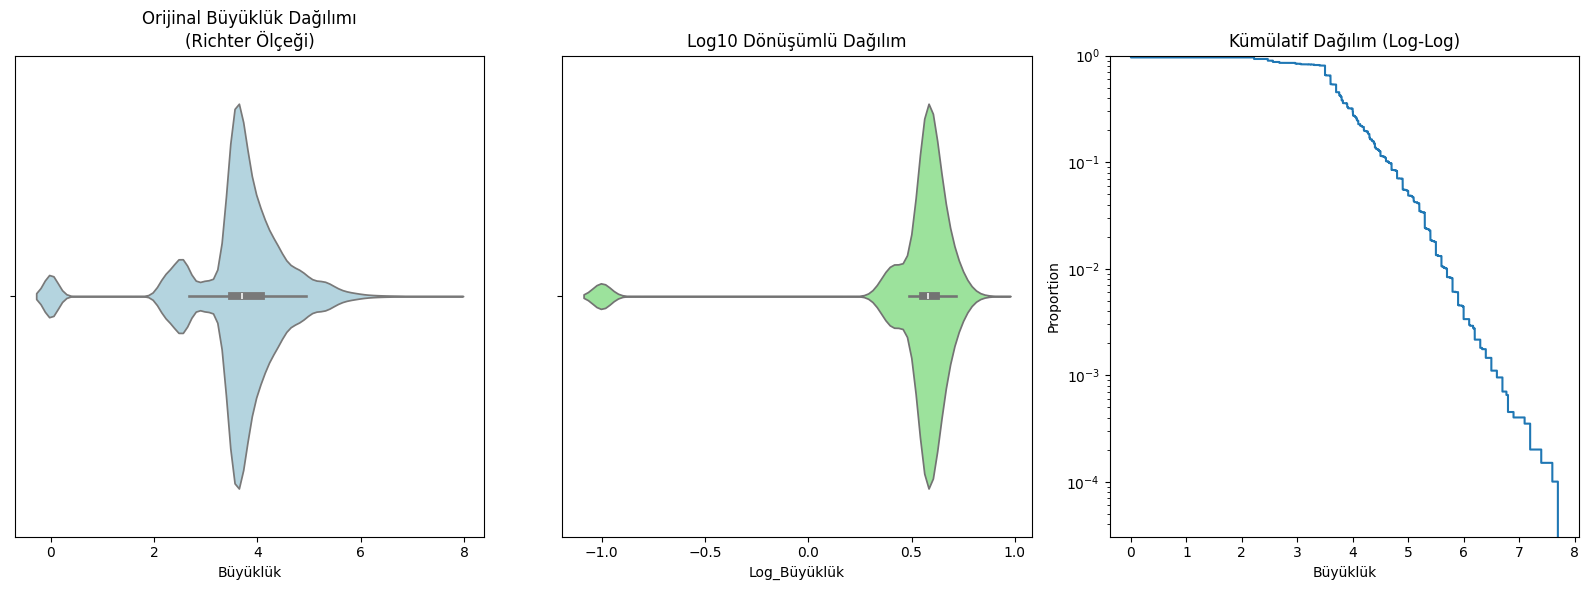

In [21]:
plt.figure(figsize=(16, 6))

# Orijinal dağılım
plt.subplot(1, 3, 1)
sns.violinplot(x=df['Büyüklük'], color='lightblue')
plt.title('Orijinal Büyüklük Dağılımı\n(Richter Ölçeği)')

# Log dönüşümlü dağılım
plt.subplot(1, 3, 2)
sns.violinplot(x=df['Log_Büyüklük'], color='lightgreen')
plt.title('Log10 Dönüşümlü Dağılım')

# Kümülatif dağılım
plt.subplot(1, 3, 3)
sns.ecdfplot(data=df, x='Büyüklük', complementary=True)
plt.yscale('log')
plt.title('Kümülatif Dağılım (Log-Log)')
plt.tight_layout()

In [22]:
from geopy.distance import geodesic

def label_aftershocks(df, mainshock_mag_threshold=6.0, time_window_days=7, distance_km=50):
    df = df.sort_values("Oluş Zamanı").reset_index(drop=True)
    df['is_aftershock'] = 0  # Başlangıçta tüm satırlar artçı değil

    for i, row in df.iterrows():
        if row['Büyüklük'] >= mainshock_mag_threshold:
            mainshock_time = row['Oluş Zamanı']
            mainshock_loc = (row['Enlem'], row['Boylam'])

            time_window = (df['Oluş Zamanı'] > mainshock_time) & \
                          (df['Oluş Zamanı'] <= mainshock_time + pd.Timedelta(days=time_window_days))

            for j in df[time_window].index:
                aftershock_loc = (df.loc[j, 'Enlem'], df.loc[j, 'Boylam'])
                distance = geodesic(mainshock_loc, aftershock_loc).km

                if distance <= distance_km and df.loc[j, 'Büyüklük'] < row['Büyüklük']:
                    df.at[j, 'is_aftershock'] = 1

    return df

In [23]:
df = label_aftershocks(df)
df['is_aftershock'].value_counts()

,count
is_aftershock,
0,18398
1,1510


In [24]:
from geopy.distance import geodesic

def ozellikleri_olustur(df):
    df = df.sort_values("Oluş Zamanı").reset_index(drop=True)

    df['Unix Zamanı'] = df['Oluş Zamanı'].astype(np.int64) // 10**9
    df['Saat'] = df['Oluş Zamanı'].dt.hour
    df['Haftanın Günü'] = df['Oluş Zamanı'].dt.dayofweek

    zaman_farki = [0]
    mesafe_farki = [0]

    for i in range(1, len(df)):
        simdi_zaman = df.loc[i, 'Oluş Zamanı']
        onceki_zaman = df.loc[i-1, 'Oluş Zamanı']
        zaman_farki.append((simdi_zaman - onceki_zaman).total_seconds())

        simdi_konum = (df.loc[i, 'Enlem'], df.loc[i, 'Boylam'])
        onceki_konum = (df.loc[i-1, 'Enlem'], df.loc[i-1, 'Boylam'])
        mesafe_farki.append(geodesic(simdi_konum, onceki_konum).km)

    df['Önceki Zaman Farkı (sn)'] = zaman_farki
    df['Önceki Mesafe (km)'] = mesafe_farki

    return df

In [25]:
df = ozellikleri_olustur(df)
df[['Büyüklük', 'Derinlik', 'Saat', 'Haftanın Günü', 'Önceki Zaman Farkı (sn)', 'Önceki Mesafe (km)']].head()

,Büyüklük,Derinlik,Saat,Haftanın Günü,Önceki Zaman Farkı (sn),Önceki Mesafe (km)
0,5.70,30.0,8,6,0.0,0.000000
1,5.50,30.0,12,6,1225621.8,132.916677
2,4.90,35.0,5,3,2739242.6,333.593565
3,5.50,10.0,4,2,4144017.4,539.999346
4,4.39,15.0,7,3,10981918.6,404.675923


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

ozellikler = ['Büyüklük', 'Derinlik', 'Saat', 'Haftanın Günü',
              'Önceki Zaman Farkı (sn)', 'Önceki Mesafe (km)']

X = df[ozellikler]
y = df['is_aftershock']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3641   39]
 [ 213   89]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3680
           1       0.70      0.29      0.41       302

    accuracy                           0.94      3982
   macro avg       0.82      0.64      0.69      3982
weighted avg       0.93      0.94      0.92      3982



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

!pip install xgboost lightgbm

def modeli_test_et(model, X_train, y_train, X_test, y_test, model_adi):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"🔹 {model_adi} Sonuçları:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print(classification_report(y_test, y_pred, target_names=["Artçı Değil", "Artçı"]))
    print("-" * 60)

modeller = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=12),  # sınıf dengesizliği için
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced')
}

for isim, model in modeller.items():
    modeli_test_et(model, X_train, y_train, X_test, y_test, isim)

🔹 Random Forest Sonuçları:
Accuracy: 0.937
              precision    recall  f1-score   support

 Artçı Değil       0.94      0.99      0.97      3680
       Artçı       0.70      0.29      0.41       302

    accuracy                           0.94      3982
   macro avg       0.82      0.64      0.69      3982
weighted avg       0.93      0.94      0.92      3982

------------------------------------------------------------
🔹 Logistic Regression Sonuçları:
Accuracy: 0.698
              precision    recall  f1-score   support

 Artçı Değil       0.99      0.68      0.81      3680
       Artçı       0.19      0.90      0.31       302

    accuracy                           0.70      3982
   macro avg       0.59      0.79      0.56      3982
weighted avg       0.93      0.70      0.77      3982

------------------------------------------------------------
🔹 KNN Sonuçları:
Accuracy: 0.919
              precision    recall  f1-score   support

 Artçı Değil       0.94      0.98      0.96 

In [28]:
import joblib
from xgboost import XGBClassifier # XGBoost sınıfını yeniden import et

# Modelleri test etme döngüsü zaten çalıştı.
# Bu döngünün sonunda `model` değişkeni en son test edilen modeli (LightGBM) içerir.
# XGBoost modelinin eğitilmiş halini kaydetmek istiyorsanız,
# ya döngü içinde kaydedin ya da döngü dışında XGBoost modeline tekrar erişin.

# En basit çözüm, döngü bittikten sonra XGBoost modeline tekrar erişmek ve kaydetmektir.
# Modeller sözlüğünden XGBoost modelini alın
xgboost_model_instance = modeller["XGBoost"]

# modeli_test_et fonksiyonu her döngüde modeli eğitir.
# Döngü zaten tamamlandığı için, `xgboost_model_instance` değişkeni eğitilmiş XGBoost modelini tutar.

# Şimdi bu eğitilmiş XGBoost modelini kaydedin
joblib.dump(xgboost_model_instance, 'xgboost_smote_model.pkl') # Doğru değişken adı kullanıldı

print("XGBoost modeli başarıyla 'xgboost_smote_model.pkl' dosyasına kaydedildi.")

# İstediğin zaman geri yüklemek için:
# loaded_model = joblib.load('xgboost_smote_model.pkl')

XGBoost modeli başarıyla 'xgboost_smote_model.pkl' dosyasına kaydedildi.


In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd # pandas'ı tekrar import et

# Özellik ve hedef değişkenleri ayır
ozellikler = ['Büyüklük', 'Derinlik', 'Saat', 'Haftanın Günü',
              'Önceki Zaman Farkı (sn)', 'Önceki Mesafe (km)'] # Özellik listesini yeniden tanımla

# Sadece kullanılacak sütunlarda eksik değer kontrolü yap
df_cleaned = df.dropna(subset=ozellikler + ['is_aftershock']).copy() # Eksik değer içeren satırları at ve kopya oluştur

# Temizlenmiş DataFrame'den özellikleri ve hedef değişkeni ayır
X = df_cleaned[ozellikler]
y = df_cleaned["is_aftershock"]

# Veriyi eğitim ve test olarak ayır
# stratify=y, sınıf dağılımını korumak için hala önemlidir
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Sınıf dağılımını kontrol edelim
print("Önce (Eğitim Seti):", y_train.value_counts())
print("Sonra (SMOTE Sonrası Eğitim Seti):", y_train_resampled.value_counts())

# Model eğitimi ve değerlendirmesi için XGBoost ve diğer modeller
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0]
}

# XGBoost modelini SMOTE sonrası eğitim verisiyle eğit
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid = GridSearchCV(xgb, params, scoring='f1', cv=3, n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

print("En iyi parametreler:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nGridSearchCV (SMOTE + XGBoost) Sonuçları (Test Seti):")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Diğer modelleri de SMOTE sonrası eğitim verisiyle test etmek isterseniz:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Daha önce tanımlanmış modeli_test_et fonksiyonunu kullanabilirsiniz
# Ancak bu fonksiyon SMOTE'yi otomatik yapmıyor, bu yüzden manuel olarak
# X_train_resampled ve y_train_resampled ile modelleri yeniden eğitmeniz gerekir.

print("\nDiğer Modellerin Sonuçları (SMOTE Sonrası Eğitim ile):")
modeller_smote = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5), # KNN class_weight'i desteklemez, scale_pos_weight XGBoost/LightGBM'e özgüdür
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced')
}

for isim, model in modeller_smote.items():
    model.fit(X_train_resampled, y_train_resampled) # Modeli SMOTElenmiş veriyle eğit
    y_pred_other = model.predict(X_test)
    print(f"🔹 {isim} Sonuçları (SMOTE Eğitim):")
    print("Accuracy:", round(accuracy_score(y_test, y_pred_other), 3))
    print(classification_report(y_test, y_pred_other, target_names=["Artçı Değil", "Artçı"]))
    print("-" * 60)

Önce (Eğitim Seti): is_aftershock
0    14718
1     1208
Name: count, dtype: int64
Sonra (SMOTE Sonrası Eğitim Seti): is_aftershock
0    14718
1    14718
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:31:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


En iyi parametreler: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}

GridSearchCV (SMOTE + XGBoost) Sonuçları (Test Seti):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3680
           1       0.40      0.52      0.45       302

    accuracy                           0.90      3982
   macro avg       0.68      0.73      0.70      3982
weighted avg       0.92      0.90      0.91      3982

[[3443  237]
 [ 144  158]]

Diğer Modellerin Sonuçları (SMOTE Sonrası Eğitim ile):
🔹 Random Forest Sonuçları (SMOTE Eğitim):
Accuracy: 0.9
              precision    recall  f1-score   support

 Artçı Değil       0.97      0.92      0.94      3680
       Artçı       0.39      0.60      0.48       302

    accuracy                           0.90      3982
   macro avg       0.68      0.76      0.71      3982
weighted avg       0.92      0.90      0.91      3982

----------------------------

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Temel XGBoost modeli
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Test verisinde tahmin
y_pred_xgb = xgb.predict(X_test)

# Sonuçlar
print("🔹 XGBoost Sonuçları (SMOTE Eğitim):")
print(classification_report(y_test, y_pred_xgb, target_names=["Artçı Değil", "Artçı"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Sonuçları (SMOTE Eğitim):
              precision    recall  f1-score   support

 Artçı Değil       0.96      0.93      0.94      3680
       Artçı       0.39      0.58      0.46       302

    accuracy                           0.90      3982
   macro avg       0.68      0.75      0.70      3982
weighted avg       0.92      0.90      0.91      3982

Confusion Matrix:
 [[3407  273]
 [ 128  174]]


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid = GridSearchCV(estimator=xgb_model,
                    param_grid=param_grid,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1,
                    verbose=1)

grid.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

best_xgb = grid.best_estimator_
y_pred_best = best_xgb.predict(X_test)

print("🔧 En iyi parametreler:", grid.best_params_)
print("🔹 XGBoost (GridSearch) Sonuçları:")
print(classification_report(y_test, y_pred_best, target_names=["Artçı Değil", "Artçı"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

🔧 En iyi parametreler: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
🔹 XGBoost (GridSearch) Sonuçları:
              precision    recall  f1-score   support

 Artçı Değil       0.96      0.93      0.95      3680
       Artçı       0.40      0.54      0.46       302

    accuracy                           0.90      3982
   macro avg       0.68      0.74      0.70      3982
weighted avg       0.92      0.90      0.91      3982

Confusion Matrix:
 [[3438  242]
 [ 139  163]]


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_proba = best_xgb.predict_proba(X_test)[:, 1]

for thresh in [0.5, 0.4, 0.35, 0.3]:
    print(f"\n🎯 Eşik: {thresh}")
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(classification_report(y_test, y_pred_thresh, target_names=["Artçı Değil", "Artçı"]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))


🎯 Eşik: 0.5
              precision    recall  f1-score   support

 Artçı Değil       0.96      0.93      0.95      3680
       Artçı       0.40      0.54      0.46       302

    accuracy                           0.90      3982
   macro avg       0.68      0.74      0.70      3982
weighted avg       0.92      0.90      0.91      3982

Confusion Matrix:
 [[3438  242]
 [ 139  163]]

🎯 Eşik: 0.4
              precision    recall  f1-score   support

 Artçı Değil       0.96      0.92      0.94      3680
       Artçı       0.37      0.58      0.45       302

    accuracy                           0.89      3982
   macro avg       0.67      0.75      0.69      3982
weighted avg       0.92      0.89      0.90      3982

Confusion Matrix:
 [[3378  302]
 [ 127  175]]

🎯 Eşik: 0.35
              precision    recall  f1-score   support

 Artçı Değil       0.97      0.91      0.94      3680
       Artçı       0.36      0.61      0.45       302

    accuracy                           0.89      3